## Ejercicio 03.- ¿Qué palabras describen a este libro?

Instrucciones:

Utilizar los textos contenidos en la carpeta "textos_stopwords" y realizar lo siguiente:

A) Utilizando un ciclo for, abrir cada uno de los archivos .txt (Cada uno corresponde a un fragmento de un libro en específico), deberás de utilizar el método listdir() como se hizo en los retos de la semana 2 del curso.

B) Para cada texto, realizar preprocesamiento* y filtrar sus stopwords correspondientes (Empleando el diccionario de Stopwords que provee NLTK), recuerda que para ello tendrás que tokenizar cada texto con ayuda de SpaCy y verificar si el texto asignado a ese token no está dentro de la lista de Stopwords de NLTK. NOTA: Almacenar en un diccionario todas las stopwords que se encuentren (No por texto sino de manera global) y contar las veces que aparece cada una, (Ésto se utilizará en el siguiente punto)  

C) Generar una gráfica de barras en la cuál se agreguen aquellas StopWords que aparecen más 10 veces entre todos los textos analizados (Asignarle colores ditintos a cada barra). Eje x = StopWord | Eje y = Frecuencia de aparición 

D) Una vez que tengas los textos para cada libro sin las stopwords, obtener los valores de "idf" para todas las palabras que aún queden en los documentos (Recuerda que esto lo pudes obtener con ayuda de las librerías de sklearn que se vieron en clase.

E) Recortar del diccionario la mitad de las palabras resultantes, es decir, ordenando del valor más bajo al más alto de idf, quitar la mitad de ellas con valores más pequeños.
Ejemplo: Si la lista generada tiene 100 valores de IDF, quedarse con los 50 más altos, si tiene 101, redondear el resultado y quedarse igualmente con 50.
Nota: Si los valores 48, 49, 50, 51, 52 son exactamente el mismo, igualmente quedarse con los que estén en la lista generada del 51 al 100

F) Una vez que se removieron la mitad de las palabras, volver a obtener los valores de idf para el nuevo conjunto de palabras recortado y calcular también los valores de tf (Éstos son ya no globales sino para cada grupo de texto)

G) Imprimir aquella palabra o palabras que tengan el Score más alto en los valores combinados de tf-idf.
Ejemplo:
Si para el texto 1, el valor más alto es 0.66 y existen tres palabras con es score, imprimir todas ellas. Si para el texto 4 el valor más alto es de 0.86 y solo una palabra tiene ese score, solo imprimir dicha palabra.

Resultados:

1) Una gráfica que contenga aquellas StopWords que se repiten más de 10 veces entre todos los textos (Colocar el títuo en la gráfica de: "Stopwords más frecuentes"

2) Impresión de lo siguiente: (Es un ejemplo)
Palabra(s) que describen al libro de Harry Potter:
Mágia, Harry, Hechizo

Palabra(s) que describen al libro de Juego de Tronos:
Dragón, Familia

Palabra(s) que describen al libro de crepúsculo:
Edward.... 

etc...

Pistas*:
- Recuerda aplicar .lower() dónde sea necesario para evitar problemas entre palabras mayúsculas y minúsculas
- Recuerda utilizar la lematización de los verbos como preprocesamiento para encontrar verbos que derivan de las mismas palabras y que no se cuenten como cosas diferentes
- En este caso tembién es recomendable deshacerte de los acentos (Revisa como hacerlo con .replce() sobre un string)
- Utiliza los códigos vistos en clase para guiarte. 

Mucha sueete!

In [16]:
# A) Lectura de archivos de la carpeta Textos_Sropwords
# B) Filtrado y conteo de StopWords en los textos

# Asignación de StopWords predefinidas para idioma Español
import nltk
from nltk.corpus import stopwords
stop_words = nltk.corpus.stopwords.words('spanish')

# Declaración de la librería de sistema listdir para recorrer la carpeta
# y la librería para rechazar valores específicos en Strings
from os import listdir
import re 
import string 

# Diccionario donde se almacenarán las stopWords que se repitan
Stops = dict()

# Lista para almacenar los textos sin StopWords
Textos = list()

# Diccionario donde se almacenarán las palabras que no sean StopWords

path = 'Textos_Stopwords/'

# Lecura de archivos
for File in listdir(path):
    with open(path + File) as Text:
        # Pasar todo a minúsculas y eliminar signos de puntuación 
        Texto = Text.read().lower()
        # Eliminamos signos de puntiación
        Texto = re.sub('['+string.punctuation+']', '', Texto) 
        
        # Se suman las palabras que sean StopWords cada vez que se encuentren
        for palabra in Texto.split():
            if(palabra in stop_words):
                if palabra in Stops:
                    Stops[palabra] += 1
                else:
                    Stops.setdefault(palabra, 1)
                    
        # Escritura de los textos sin StopWords en una lista
        for Stop in Stops.keys():
            Texto = Texto.replace(' ' + Stop + ' ', ' ')
        Textos.append(Texto)       

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 <a list of 40 Text xticklabel objects>)

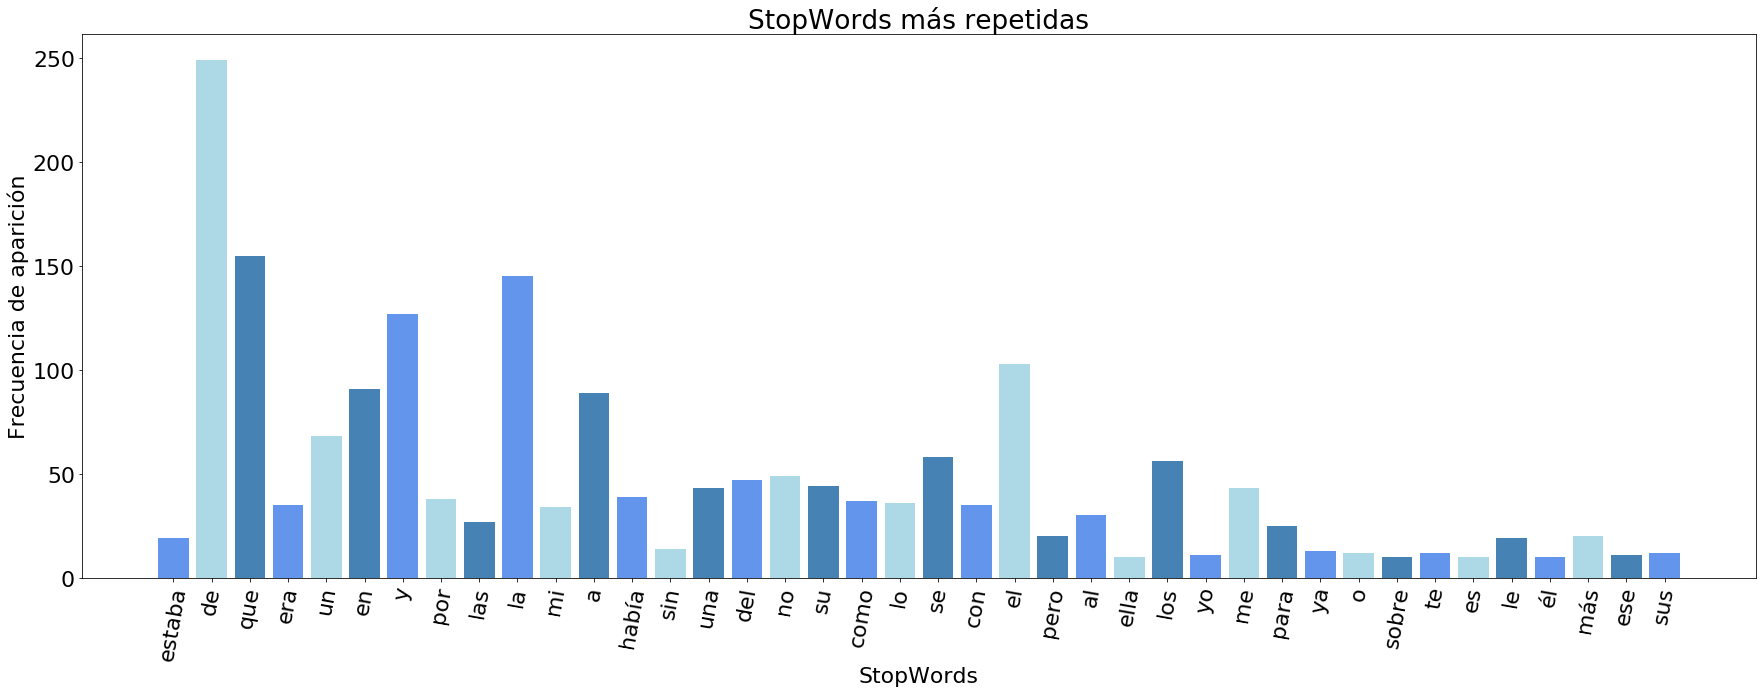

In [17]:
# C) Gráfica con StopWords que aparecen al menos 10 veces en el texto

# Declarar la librería para plotear y los parámetros de la gráfica
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(30,10))

# Conservamos solo las StopWords que se repiten al menos 10 veces
Stops2 = dict()
for Stop, Freq in Stops.items():
    if Freq >= 10:
        Stops2.setdefault(Stop, Freq)

# Ploteo de la gráfica
plt.bar(Stops2.keys(), Stops2.values(), color=['cornflowerblue', 'lightblue', 'steelblue'])  
plt.ylabel('Frecuencia de aparición')
plt.xlabel('StopWords')
plt.title('StopWords más repetidas')
plt.xticks(rotation=80)

In [77]:
# D) Obtención  del valor de IDF

# Importamos las librerías de pandas y Sklearn
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Inicializar el vectorizador
CV = CountVectorizer()

# Convertir el arreglo de textos en un modelo de Textos Vs Vocabulario
VectorPalabras = CV.fit_transform(Textos)

# Forma del vector resultante (Textos, Vocabulario)
print("Forma del vector(Textos, Vocabulario) = " + str(VectorPalabras.shape))

# Creamos un transformador de nuestro vector  
tfidf_transformer = TfidfTransformer(smooth_idf=False, sublinear_tf=False, use_idf=True)
tfidf_transformer.fit(VectorPalabras)

# Insertamos los valores en un DataSet
df_idf = pd.DataFrame(tfidf_transformer.idf_, index = CV.get_feature_names(), columns = ["Pesos-IDF"])
 
# Ordenams los valores del de menor relevancia hasta el de mayor relevancia
df_idf.sort_values(by=['Pesos-IDF'])

Forma del vector(Textos, Vocabulario) = (5, 1525)


,Pesos-IDF
si,1.223144
después,1.223144
tan,1.223144
fuego,1.223144
nunca,1.223144
...,...
escolta,2.609438
escolar,2.609438
escarabajo,2.609438
estaba,2.609438


In [78]:
# E) Recorte de la mitad de los elementos con los valores más bajos de IDF

# Elementos que se tomarán en cuenta
Elementos_nuevos = int(len(df_idf)*0.5)

# Generamos un nuevo dataSet ordenado por los valores de IDF
df_idf_new = df_idf.sort_values(by=['Pesos-IDF'])
df_idf_new = df_idf_new[Elementos_nuevos:]

df_idf_new.sort_values(by=['Pesos-IDF'])

,Pesos-IDF
roto,2.609438
ir,2.609438
intentaba,2.609438
instituto,2.609438
insoportablemente,2.609438
...,...
aparta,2.609438
aparcamiento,2.609438
antimuggle,2.609438
apoyen,2.609438


In [82]:
# F) Generar los valores de IDF y tf-idf si los textos ya solo están conformados por las palabras con altos IDFs

# Lista para los nuevos textos
New_Textos = list()

for texto in Textos:
    New_texto = ''
    for palabra in texto.split():
        if palabra in df_idf_new.index:
            New_texto = New_texto + palabra + ' '
    New_Textos.append(New_texto)
    
# Inicializar el vectorizador
CV = CountVectorizer()

# Convertir el arreglo de textos en un modelo de Textos Vs Vocabulario
VectorPalabras = CV.fit_transform(New_Textos)

# Forma del vector resultante (Textos, Vocabulario)
print("Forma del vector(Textos, Vocabulario) = " + str(VectorPalabras.shape))

# Creamos un transformador de nuestro vector  
tfidf_transformer = TfidfTransformer(smooth_idf=False, sublinear_tf=False, use_idf=True)
tfidf_transformer.fit(VectorPalabras)

# Insertamos los valores en un DataSet
df_idf = pd.DataFrame(tfidf_transformer.idf_, index = CV.get_feature_names(), columns = ["Pesos-IDF"])
 
# Ordenams los valores del de menor relevancia hasta el de mayor relevancia
df_idf.sort_values(by=['Pesos-IDF'])

# Creamos el "count vector" el cuál indica la cantidad de 
# veces que se repite cada token único
count_vector = CV.transform(New_Textos)

# Cálculo de los valores para tf-idf
tf_idf_vector = tfidf_transformer.transform(count_vector)

# Generamos un DataFrame con los valores tf-idf de cada token
# para cada texto
df = pd.DataFrame(tf_idf_vector.T.todense(), 
                  index=CV.get_feature_names(), 
                  columns=["Texto 1", "Texto 2", "Texto 3", "Texto 4", "Texto 5"])

Forma del vector(Textos, Vocabulario) = (5, 736)


In [97]:
# G) Impresión de las palabras más relevantes para cada grupo de texto

# Obtenemos los valores para el libro #1
df_tfidf1 = pd.DataFrame(df['Texto 1'])
df_tfidf1 = df_tfidf1.sort_values(by=["Texto 1"] ,ascending=False).head(5)
print(df_tfidf1)

print("\nLa(s) palabra(s) más importante(s) para éste fragemento de libro es(son): ")
x = 0
while True:
    if df_tfidf1["Texto 1"][x] == df_tfidf1["Texto 1"][0]:
        print(str(x+1) + ": " + str(df_tfidf1.index[x]))
        x += 1
    else:
        break

             Texto 1
edward      0.513448
alice       0.285249
cumpleaños  0.256724
abuela      0.171149
casi        0.171149

La(s) palabra(s) más importante(s) para éste fragemento de libro es(son): 
1: edward


In [99]:
# Obtenemos los valores para el libro #2
df_tfidf2 = pd.DataFrame(df['Texto 2'])
df_tfidf2 = df_tfidf2.sort_values(by=["Texto 2"] ,ascending=False).head(5)
print(df_tfidf2)

print("\nLa(s) palabra(s) más importante(s) para éste fragemento de libro es(son): ")
x = 0
while True:
    if df_tfidf2["Texto 2"][x] == df_tfidf2["Texto 2"][0]:
        print(str(x+1) + ": " + str(df_tfidf2.index[x]))
        x += 1
    else:
        break

             Texto 2
rey         0.385758
crinblanca  0.231455
gondor      0.154303
rohan       0.154303
ciudad      0.154303

La(s) palabra(s) más importante(s) para éste fragemento de libro es(son): 
1: rey


In [100]:
# Obtenemos los valores para el libro #3
df_tfidf3 = pd.DataFrame(df['Texto 3'])
df_tfidf3 = df_tfidf3.sort_values(by=["Texto 3"] ,ascending=False).head(5)
print(df_tfidf3)

print("\nLa(s) palabra(s) más importante(s) para éste fragemento de libro es(son): ")
x = 0
while True:
    if df_tfidf3["Texto 3"][x] == df_tfidf3["Texto 3"][0]:
        print(str(x+1) + ": " + str(df_tfidf3.index[x]))
        x += 1
    else:
        break

             Texto 3
harry       0.317526
albus       0.317526
colegio     0.226805
baúl        0.181444
dumbledore  0.181444

La(s) palabra(s) más importante(s) para éste fragemento de libro es(son): 
1: harry
2: albus


In [102]:
# Obtenemos los valores para el libro #4
df_tfidf4 = pd.DataFrame(df['Texto 4'])
df_tfidf4 = df_tfidf4.sort_values(by=["Texto 4"] ,ascending=False).head(5)
print(df_tfidf4)

print("\nLa(s) palabra(s) más importante(s) para éste fragemento de libro es(son): ")
x = 0
while True:
    if df_tfidf4["Texto 4"][x] == df_tfidf4["Texto 4"][0]:
        print(str(x+1) + ": " + str(df_tfidf4.index[x]))
        x += 1
    else:
        break

              Texto 4
fantasía     0.538816
1997         0.179605
inesperados  0.179605
juego        0.179605
comunes      0.179605

La(s) palabra(s) más importante(s) para éste fragemento de libro es(son): 
1: fantasía


In [103]:
# Obtenemos los valores para el libro #5
df_tfidf5 = pd.DataFrame(df['Texto 5'])
df_tfidf5 = df_tfidf5.sort_values(by=["Texto 5"] ,ascending=False).head(5)
print(df_tfidf5)

print("\nLa(s) palabra(s) más importante(s) para éste fragemento de libro es(son): ")
x = 0
while True:
    if df_tfidf5["Texto 5"][x] == df_tfidf5["Texto 5"][0]:
        print(str(x+1) + ": " + str(df_tfidf5.index[x]))
        x += 1
    else:
        break

            Texto 5
capitolio  0.356034
dice       0.237356
beso       0.237356
hacen      0.237356
responder  0.237356

La(s) palabra(s) más importante(s) para éste fragemento de libro es(son): 
1: capitolio
